the data

In [26]:
x_data = [1.0, 2.0, 2.8, 3.8, 4.6, 5.4, 6.4, 6.8]
y_data = [-4.210, -7.798, -9.664, -9.790, -7.410, -2.125, 9.691, 16.373]

points = list(zip(x_data, y_data))

lagrange interpolation

In [27]:
def lagrange_interpolation(x_values, y_values):
    def polynomial(x):
        total = 0
        n = len(x_values)
        for i in range(n):
            xi, yi = x_values[i], y_values[i]

            def g(i, n):
                tot_mul = 1
                for j in range(n):
                    if i != j:
                        xj = x_values[j]
                        tot_mul *= (x - xj) / (xi - xj)
                return tot_mul
            
            total += yi * g(i, n)
        return total
    return polynomial

consecutive combinations from list lst of length n generator

In [28]:
def consecutive_combinations(lst, n):
    for i in range(len(lst) - n + 1):
        yield lst[i:i + n]

product function

In [29]:
def prod(x, x_k):
    result = 1
    for k in x_k:
        result *= (x - k)
    return result

remainder term function

In [30]:
def remainder(x, x_list):
    return abs(prod(x, x_list))

interpolation range and step

In [31]:
import numpy as np

dx = .2
x = np.arange(x_data[0], x_data[-1] + dx, dx)

iterate over orders, over points, over interpolations, selecting for best one

In [32]:
import pandas as pd

results = pd.DataFrame()
results['x'] = x

for x in results['x']:

    for n in range(2, 6):

        combos = list(consecutive_combinations(points, n))

        combo_errors = []

        for combo in combos:
            
            combo_x, combo_y = zip(*combo)

            combo_error = remainder(x, combo_x)

            combo_errors.append(combo_error)

        best_combo_index = combo_errors.index(min(combo_errors))

        best_combo = combos[best_combo_index]

        best_combo_x, best_combo_y = zip(*best_combo)

        best_combo_interpolated = lagrange_interpolation(best_combo_x, best_combo_y)

        results.loc[results['x'] == x, f'n={n-1}'] = best_combo_interpolated(x)

graph the results

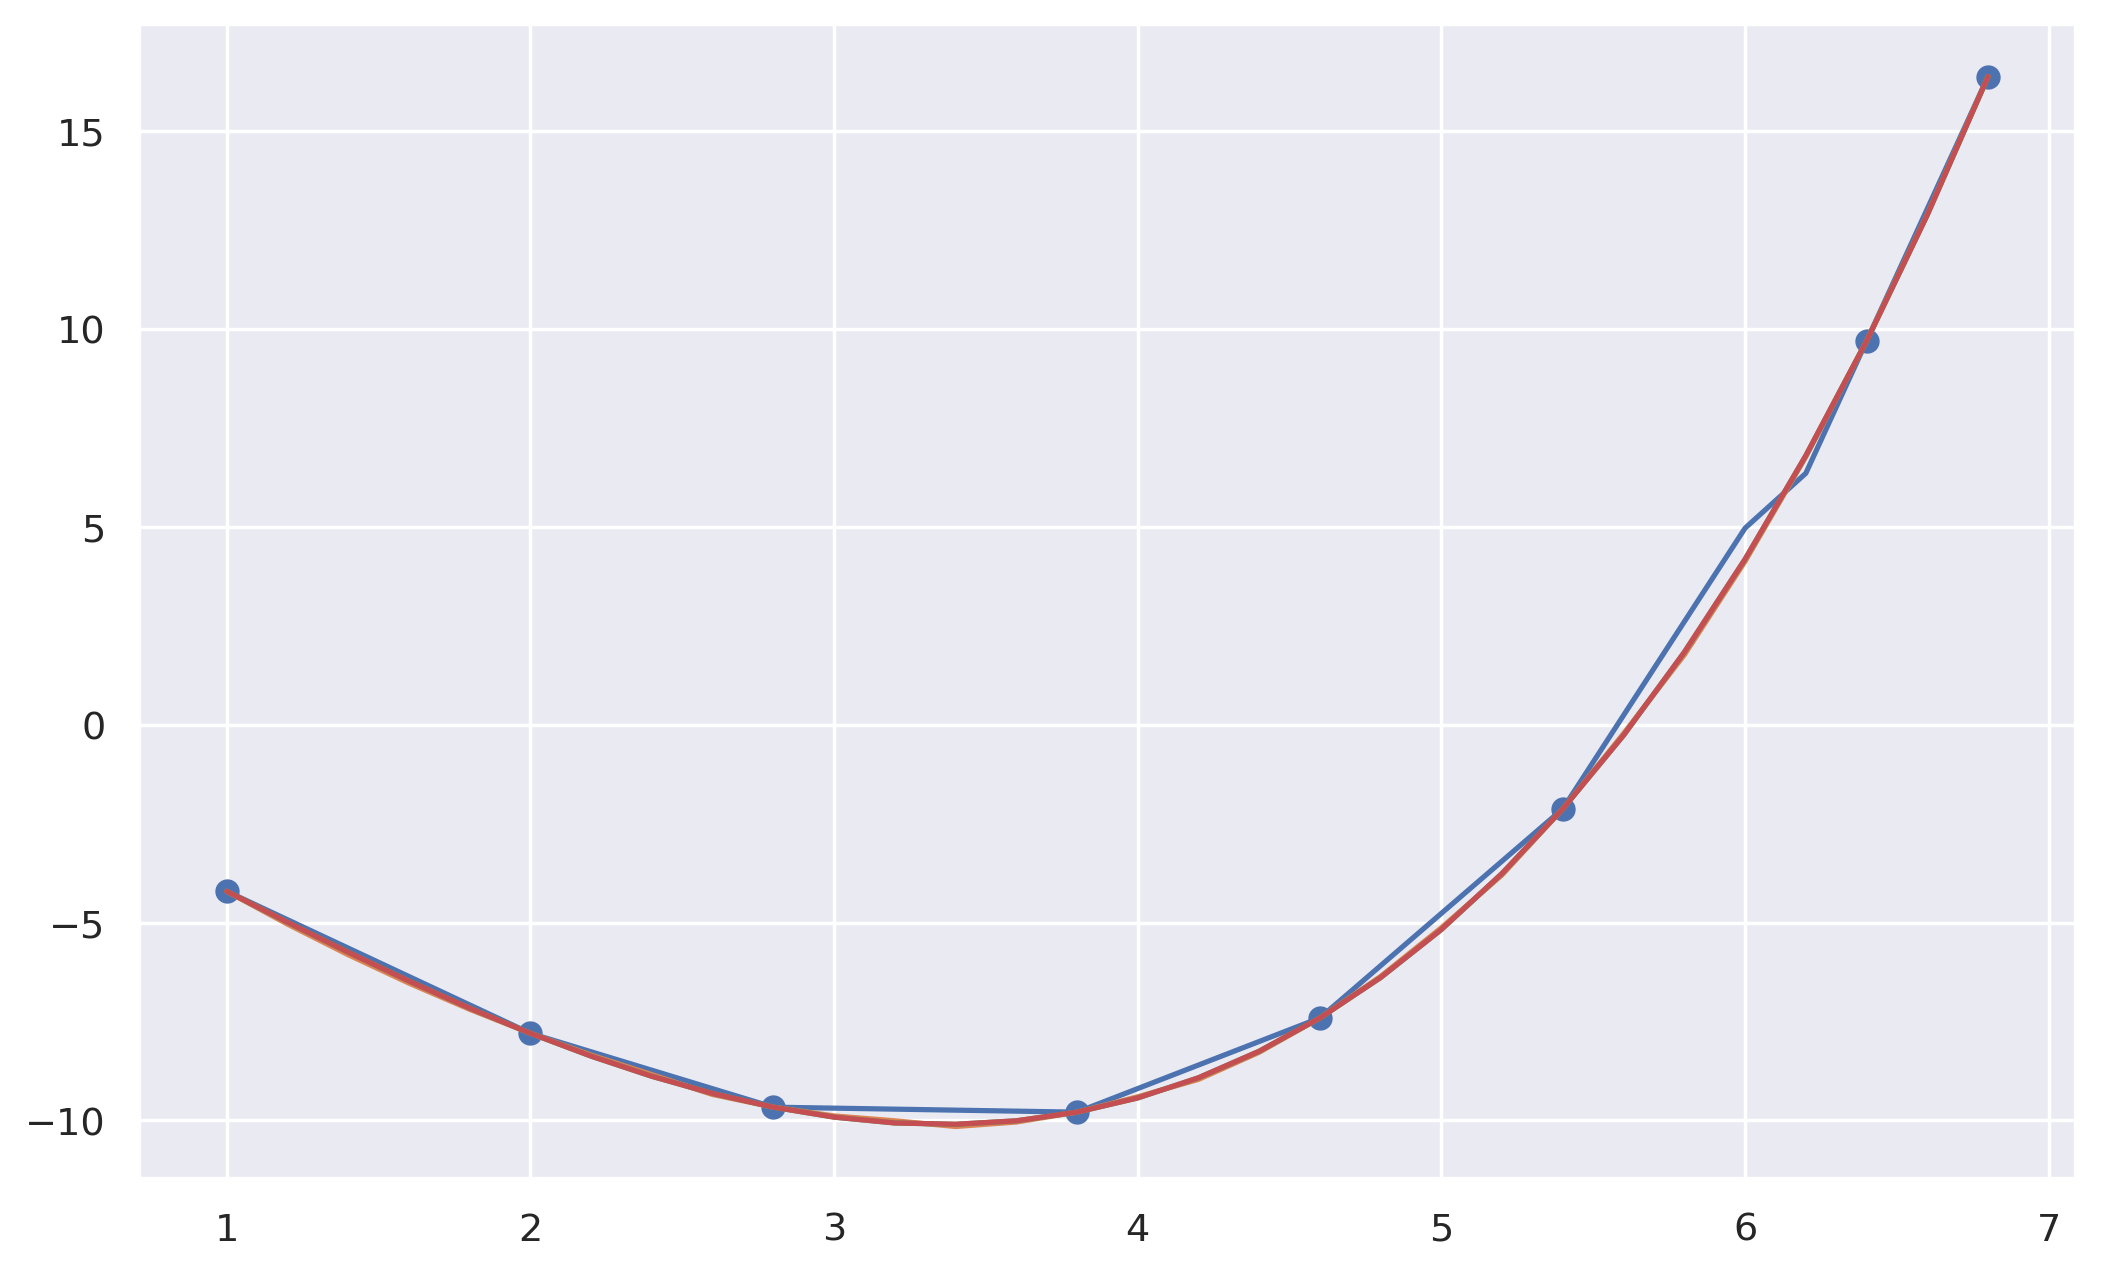

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6), dpi=250)

for order in range(1,5):
    plt.plot(results['x'], results[f'n={order}'])

plt.scatter(x_data, y_data)

plt.show()

In [34]:
results = results.round(3)

results.to_csv("results.csv", index=False)